In [1]:
import tonic
from tonic import SlicedDataset, slicers

In [38]:
trainset = tonic.datasets.DVSGesture('data', train=True)

frame_time = 200_000 # microseconds
slicer = slicers.SliceByTime(time_window=frame_time)
transform = tonic.transforms.ToTimesurface(sensor_size=trainset.sensor_size, dt=frame_time, tau=frame_time/10)
sliced_dataset = SlicedDataset(trainset, slicer=slicer, metadata_path=f"metadata/slicing/{frame_time}", transform=transform)

Metadata read from metadata/slicing/200000/slice_metadata.h5.


In [39]:
surf, label = sliced_dataset[2000]

In [40]:
surf.shape

(1, 2, 128, 128)

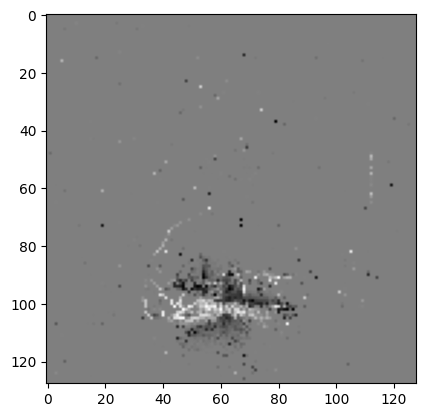

In [41]:
import matplotlib.pyplot as plt

surf_diff = surf[0, 1] - surf[0, 0]
plt.imshow(surf_diff, cmap='gray')

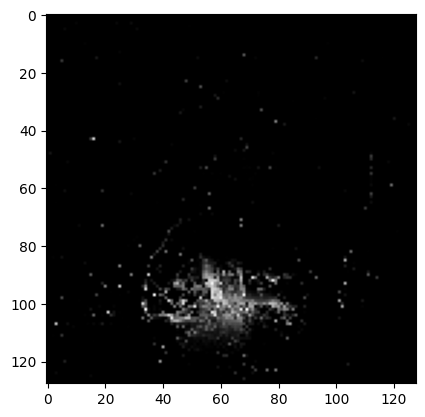

In [42]:
plt.imshow(surf[0].sum(0), cmap='gray')